<a href="https://colab.research.google.com/github/EduGH15/Algoritmos-de-aprendizaje/blob/main/Clasificar_imagenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Crear las carpetas para subir las imagenes
!mkdir Gatos
!mkdir Perros
!mkdir Serpientes

In [2]:
#Entrar en cada carpeta y descomprimir el archivo zip
%cd Gatos
!unzip Gatos.zip
%cd ..

%cd Perros
!unzip Perros.zip
%cd ..

%cd Serpientes
!unzip Serpientes.zip
%cd ..

/content/Gatos
Archive:  Gatos.zip
 extracting: images.jpg              
 extracting: images2.jpg             
 extracting: image.jpeg              
 extracting: images3.jpg             
 extracting: image2.jpeg             
 extracting: image3.jpeg             
 extracting: image4.jpeg             
 extracting: image5.jpeg             
 extracting: image6.jpeg             
 extracting: image7.jpeg             
 extracting: image8.jpeg             
 extracting: image9.jpeg             
 extracting: image10.jpeg            
 extracting: image11.jpeg            
 extracting: image12.jpeg            
 extracting: image13.jpeg            
 extracting: image14.jpeg            
 extracting: image15.jpeg            
 extracting: image16.jpeg            
 extracting: image17.jpeg            
 extracting: image18.jpeg            
 extracting: image19.jpeg            
 extracting: image20.jpeg            
 extracting: image21.jpeg            
 extracting: image22.jpeg            
 extracting: im

In [3]:
#Borrar los archivo ZIP
!rm -rf /content/Gatos/Gatos.zip
!rm -rf /content/Perros/Perros.zip
!rm -rf /content/Serpientes/Serpientes.zip

In [4]:
#Mostrar cuantas imagenes tengo de cada categoria
!ls /content/Gatos | wc -l
!ls /content/Perros | wc -l
!ls /content/Serpientes | wc -l

163
187
185


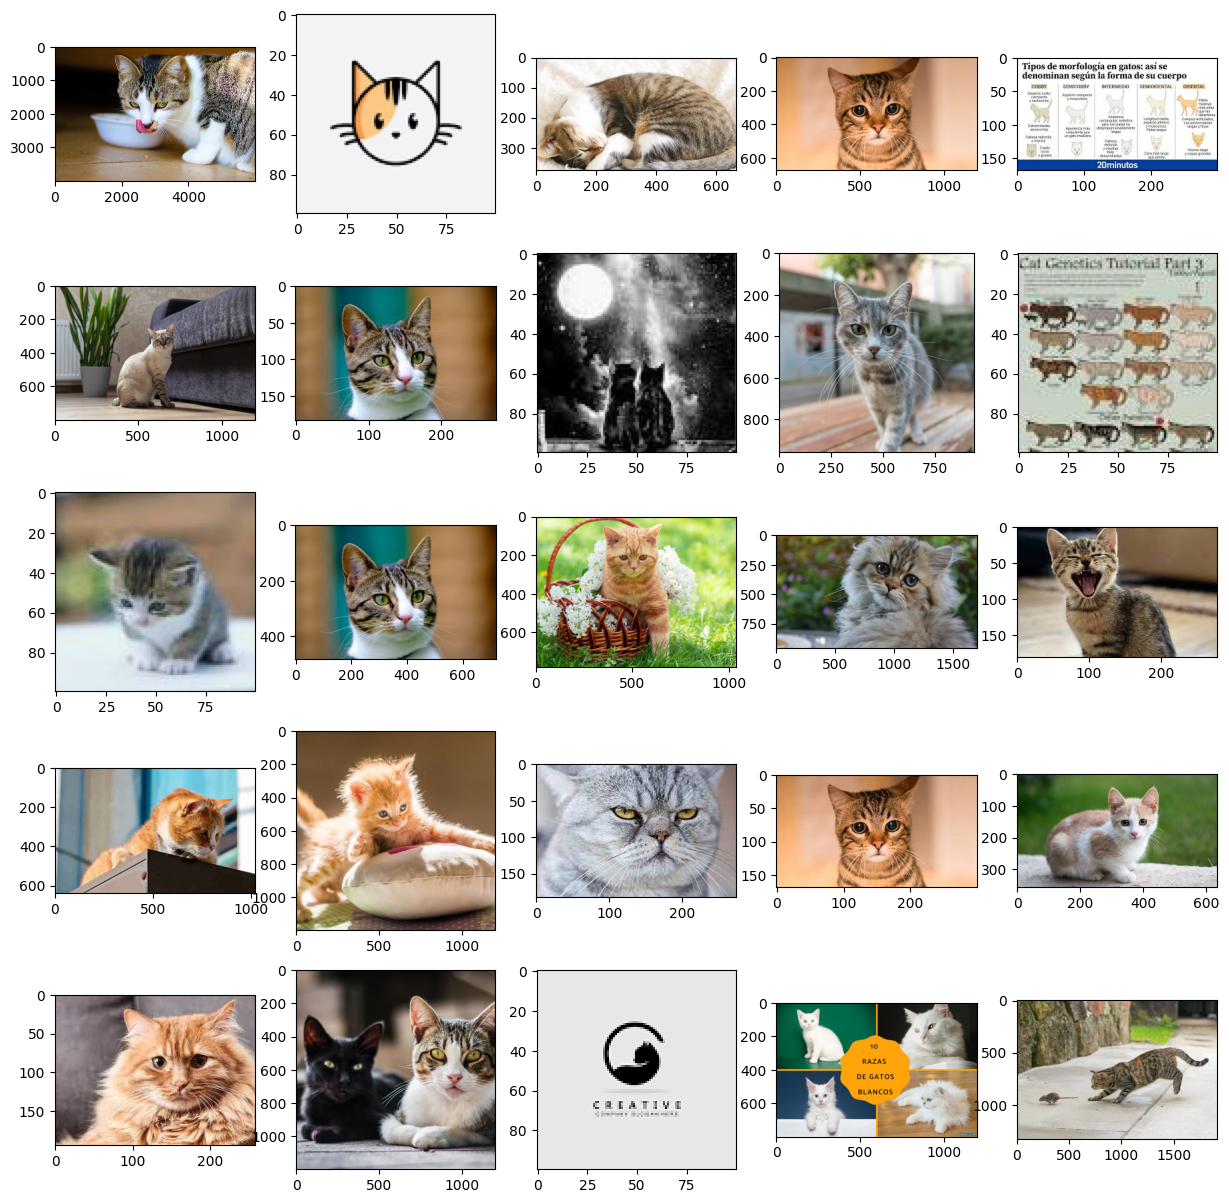

In [5]:
#Mostrar algunas imagenes con pyplot
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(15,15))

carpeta = '/content/Gatos'
imagenes = os.listdir(carpeta)

for i, nombreimg in enumerate(imagenes[:25]):
  plt.subplot(5,5,i+1)
  imagen = mpimg.imread(carpeta + '/' + nombreimg)
  plt.imshow(imagen)

In [6]:
#Crear carpetas para hacer el set de datos

!mkdir dataset
!mkdir dataset/Gatos
!mkdir dataset/Perros
!mkdir dataset/Serpientes

In [7]:
#Copiar imagenes que subimos a carpetas del dataset
#Limitar para que todos tengan la misma cantidad de imagenes

import shutil
carpeta_fuente = '/content/Gatos'
carpeta_destino = '/content/dataset/Gatos'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 163:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [8]:
carpeta_fuente = '/content/Perros'
carpeta_destino = '/content/dataset/Perros'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 163:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [9]:
carpeta_fuente = '/content/Serpientes'
carpeta_destino = '/content/dataset/Serpientes'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 163:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [11]:
#Mostrar cuantas imagenes tengo de cada categoria en el dataset
!ls /content/dataset/Gatos | wc -l
!ls /content/dataset/Perros | wc -l
!ls /content/dataset/Serpientes | wc -l

163
163
163


Found 392 images belonging to 3 classes.
Found 96 images belonging to 3 classes.


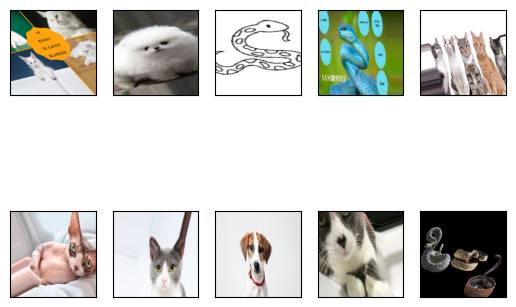

In [12]:
#Aumento de datos con ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

#Crear el dataset generador
datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range = 30,
    width_shift_range = 0.25,
    height_shift_range = 0.25,
    shear_range = 15,
    zoom_range = [0.5, 1.5],
    validation_split=0.2 #20% para pruebas
)

#Generadores para sets de entrenamiento y pruebas
data_gen_entrenamiento = datagen.flow_from_directory('/content/dataset', target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='training')
data_gen_pruebas = datagen.flow_from_directory('/content/dataset', target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='validation')

#Imprimir 10 imagenes del generador de entrenamiento
for imagen, etiqueta in data_gen_entrenamiento:
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i])
  break
plt.show()

In [13]:
import tensorflow as tf
import tensorflow_hub as hub

url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
mobilenetv2 = hub.KerasLayer(url, input_shape=(224,224,3))

In [14]:
#Congelar el modelo descargado
mobilenetv2.trainable = False

In [15]:
#Agregamos nuestra capa
modelo = tf.keras.Sequential([
    mobilenetv2,
    tf.keras.layers.Dense(3, activation='softmax')
])

In [16]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 3)                 3843      
                                                                 
Total params: 2261827 (8.63 MB)
Trainable params: 3843 (15.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [17]:
#Compilar como siempre
modelo.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [18]:
#Entrenar el modelo
EPOCAS = 50

historial = modelo.fit(
    data_gen_entrenamiento, epochs=EPOCAS, batch_size=32,
    validation_data=data_gen_pruebas
)

Epoch 1/50
13/13 [==============================] - ETA: 0s - loss: 1.0209 - accuracy: 0.5204

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


13/13 [==============================] - 27s 950ms/step - loss: 1.0209 - accuracy: 0.5204 - val_loss: 0.5834 - val_accuracy: 0.8646
Epoch 2/50
13/13 [==============================] - 11s 898ms/step - loss: 0.6147 - accuracy: 0.7347 - val_loss: 0.4176 - val_accuracy: 0.8750
Epoch 3/50
13/13 [==============================] - 11s 910ms/step - loss: 0.4367 - accuracy: 0.8418 - val_loss: 0.3536 - val_accuracy: 0.8750
Epoch 4/50
13/13 [==============================] - 11s 903ms/step - loss: 0.3619 - accuracy: 0.8520 - val_loss: 0.2929 - val_accuracy: 0.8958
Epoch 5/50
13/13 [==============================] - 10s 830ms/step - loss: 0.3197 - accuracy: 0.8750 - val_loss: 0.2277 - val_accuracy: 0.9375
Epoch 6/50
13/13 [==============================] - 12s 864ms/step - loss: 0.2909 - accuracy: 0.8878 - val_loss: 0.2705 - val_accuracy: 0.9167
Epoch 7/50
13/13 [==============================] - 12s 881ms/step - loss: 0.2715 - accuracy: 0.9133 - val_loss: 0.2067 - val_accuracy: 0.9167
Epoch 8/50

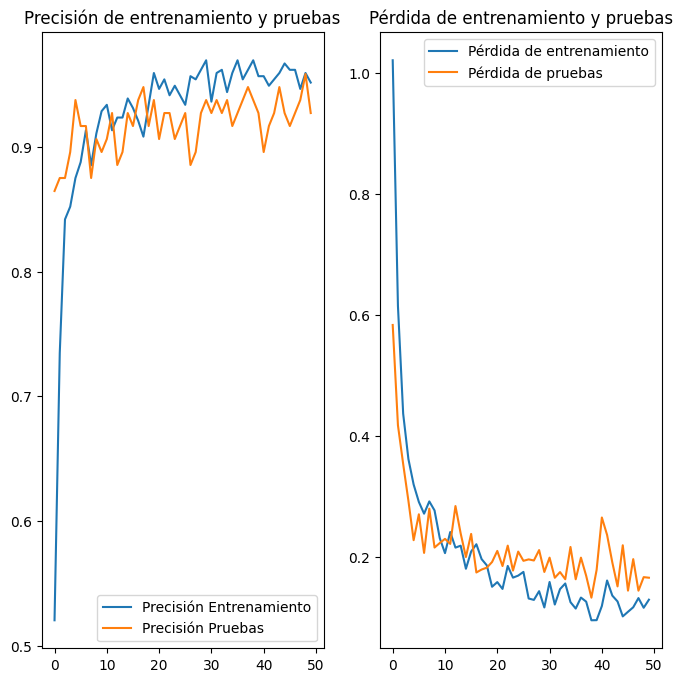

In [19]:
#Graficas de precisión
acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']

loss = historial.history['loss']
val_loss = historial.history['val_loss']

rango_epocas = range(50)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(rango_epocas, acc, label='Precisión Entrenamiento')
plt.plot(rango_epocas, val_acc, label='Precisión Pruebas')
plt.legend(loc='lower right')
plt.title('Precisión de entrenamiento y pruebas')

plt.subplot(1,2,2)
plt.plot(rango_epocas, loss, label='Pérdida de entrenamiento')
plt.plot(rango_epocas, val_loss, label='Pérdida de pruebas')
plt.legend(loc='upper right')
plt.title('Pérdida de entrenamiento y pruebas')
plt.show()

In [20]:
#Categorizar una imagen de internet
from PIL import Image
import requests
from io import BytesIO
import cv2

def categorizar(url):
  respuesta = requests.get(url)
  img = Image.open(BytesIO(respuesta.content))
  img = np.array(img).astype(float)/255

  img = cv2.resize(img, (224,224))
  prediccion = modelo.predict(img.reshape(-1, 224, 224, 3))
  return np.argmax(prediccion[0], axis=-1)

In [27]:
def interpretar_predicción(prediccion):
  if(prediccion == 0):
    print("La imagen fue identificada como <Gato>")
  elif(prediccion == 1):
    print("La imagen fue identificada como <Perro>")
  elif(prediccion == 2):
    print("La imagen fue identificada como <Serpiente>")
  else:
    print("No se pudo identificar la imagen")

In [33]:
#0 = Gato, 1 = Perro, 2 = Serpiente
url = 'https://static.wikia.nocookie.net/reinoanimalia/images/a/a9/Husky_siberiano_20.png/revision/latest?cb=20150513044750&path-prefix=es'
prediccion = categorizar (url)
interpretar_predicción(prediccion)

1/1 [==============================] - 0s 25ms/step
La imagen fue identificada como <Perro>
